In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [33]:
df = pd.read_csv('../MyPython/dataset/Salary_Data.csv', sep=';')
print(df.shape)
df.head()

(30, 2)


,Años de experiencia,Salario
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [34]:
df.columns = ['AE', 'Salario']
df.head()

,AE,Salario
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [35]:
df.info() #mirar valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   AE       30 non-null     float64
 1   Salario  30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


In [36]:
df.isna().sum() #no hay valores nulos

AE         0
Salario    0
dtype: int64

Text(0.5, 1.0, 'Relación entre años de experiencia y salario')

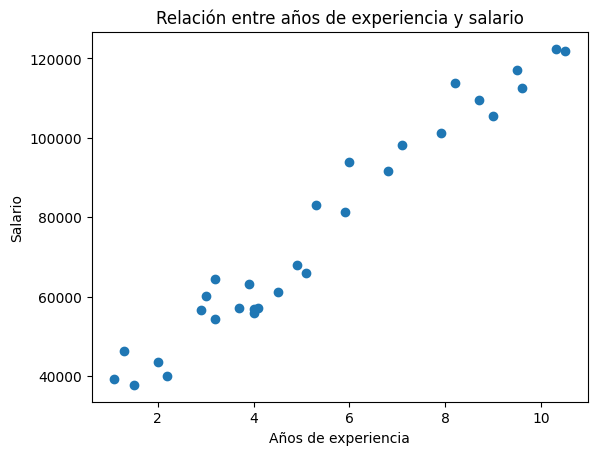

In [37]:
plt.scatter(x=df['AE'], y=df['Salario'])
plt.xlabel('Años de experiencia')
plt.ylabel('Salario')
plt.title('Relación entre años de experiencia y salario')

In [38]:
df.corr()

,AE,Salario
AE,1.000000,0.978242
Salario,0.978242,1.000000


<Axes: >

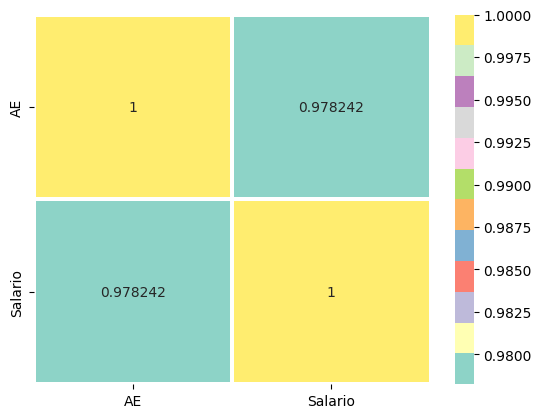

In [39]:
import seaborn as sns
sns.heatmap(df.corr(), 
annot=True, fmt='.6g', 
linewidths=1.5, 
cmap="Set3")